# TP1 : Logique Floue 
## Réalisé par Nassima RHANNOUCH, IID3

## Exercice 1 : Régulation de distance entre véhicules

On considère un système de régulation de distance entre véhicules basé sur la logique floue.  

On souhaite modéliser la variable d’entrée **« Distance_to_next_car »**, représentant la distance séparant un véhicule du suivant.

### Étapes à réaliser :

1. **Définir la variable floue** `Distance_to_next_car` sur l’univers de discours `[0, 30]`.

2. **Créer cinq ensembles flous** correspondant aux termes linguistiques suivants :
   - `v_small` : très petite distance  
   - `small` : petite distance  
   - `perfect` : distance idéale  
   - `big` : grande distance  
   - `v_big` : très grande distance  

3. **Modéliser ces ensembles flous** en utilisant des fonctions d’appartenance :
   - **Trapézoïdales** pour les extrêmes (`v_small`, `v_big`)  
   - **Triangulaires** pour les autres (`small`, `perfect`, `big`)  
   - Choisir des **paramètres numériques appropriés** pour chaque fonction.

4. **Visualiser les fonctions d’appartenance** obtenues à l’aide d’un graphique.



In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import skfuzzy.control as ctrl

1. **Définir la variable floue** `Distance_to_next_car` sur l’univers de discours `[0, 30]`.

In [2]:
distance = ctrl.Antecedent(np.arange(0, 31, 1), 'Distance_to_next_car')

In [3]:
distance['v_small'] = fuzz.trapmf(distance.universe, [0, 0, 3, 6])
distance['small'] = fuzz.trimf(distance.universe, [3, 6, 10])
distance['perfect'] = fuzz.trimf(distance.universe, [8, 15, 22])
distance['big'] = fuzz.trimf(distance.universe, [18, 22, 26])
distance['v_big'] = fuzz.trapmf(distance.universe, [24, 27, 30, 30])

c:\Users\Lenovo\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


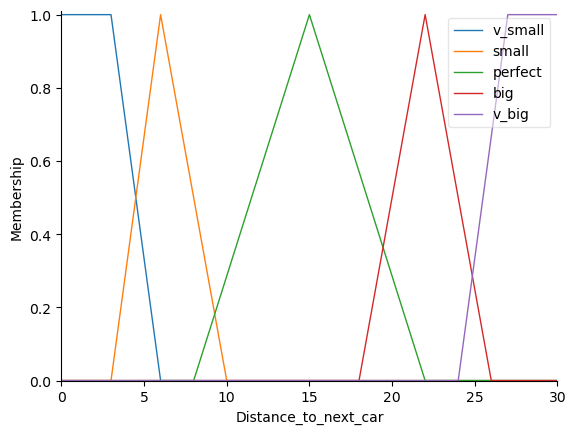

In [4]:
distance.view()

## Exercice 2 : 
Dans le cadre d’un **système de contrôle de la vitesse** basé sur la logique floue, on souhaite modéliser la variable d’entrée **Speed_change**, représentant la variation de la vitesse du véhicule par rapport à un instant précédent.

### 1. Définition de la variable floue
Définir la variable floue **Speed_change** sur l’univers de discours **[-20, 20]**.

### 2. Termes linguistiques
Créer trois ensembles flous correspondant aux termes linguistiques suivants :
- **declining** : vitesse en diminution  
- **constant** : vitesse stable  
- **growing** : vitesse en augmentation  

### 3. Fonctions d’appartenance
Utiliser des **fonctions d’appartenance trapézoïdales et triangulaires** pour représenter ces ensembles flous.

### 4. Visualisation
Tracer les **fonctions d’appartenance** de la variable **Speed_change**.


In [5]:
speed_change = ctrl.Antecedent(np.arange(-20, 21, 1), 'Speed_change')

In [6]:
speed_change['declining'] = fuzz.trimf(speed_change.universe, [-20, -10, 0])
speed_change['growing'] = fuzz.trimf(speed_change.universe, [0, 10, 20])

In [7]:
speed_change['constant'] = fuzz.trapmf(speed_change.universe, [-5, -2, 2, 5])

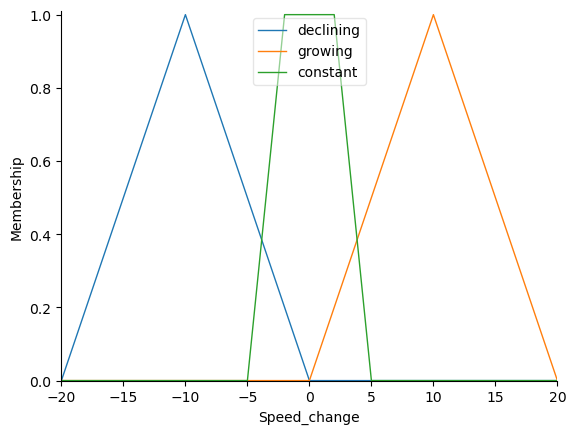

In [8]:
speed_change.view()


## Exercice 3 : 
Dans un **système de régulation de la vitesse automobile** fondé sur la logique floue, on souhaite modéliser la variable de sortie **Acceleration_Adjust**, représentant l’ajustement de l’accélération du véhicule à appliquer selon les conditions de conduite.

### 1. Définition de la variable floue
Définir la variable floue **Acceleration_Adjust** sur l’univers de discours **[-3, 3]**.

### 2. Termes linguistiques
Créer cinq ensembles flous correspondant aux termes linguistiques suivants :
- **neg_big** : forte décélération  
- **neg_small** : faible décélération  
- **zero** : aucune variation  
- **pos_small** : faible accélération  
- **pos_big** : forte accélération  

### 3. Fonctions d’appartenance
Utiliser des **fonctions d’appartenance trapézoïdales et triangulaires** pour modéliser ces ensembles flous.

### 4. Visualisation
Tracer les **fonctions d’appartenance** de la variable **Acceleration_Adjust**.


In [9]:
acc_adjust = ctrl.Consequent(np.arange(-3, 4, 1), 'Acceleration_Adjust')

In [10]:
acc_adjust['neg_big'] = fuzz.trapmf(acc_adjust.universe, [-3, -3, -2, -1])
acc_adjust['neg_small'] = fuzz.trimf(acc_adjust.universe, [-2, -1, 0])
acc_adjust['zero'] = fuzz.trimf(acc_adjust.universe, [-1, 0, 1])
acc_adjust['pos_small'] = fuzz.trimf(acc_adjust.universe, [0, 1, 2])
acc_adjust['pos_big'] = fuzz.trapmf(acc_adjust.universe, [1, 2, 3, 3])    

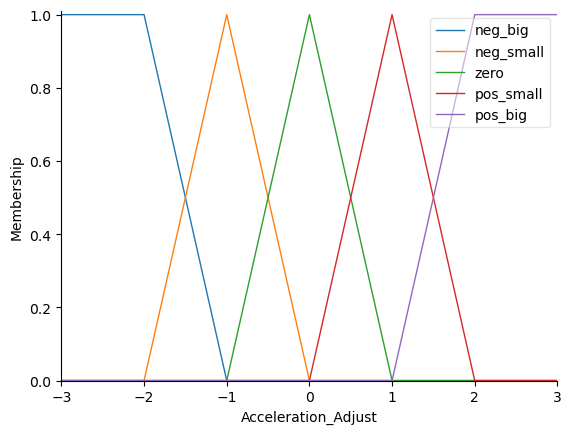

In [11]:
acc_adjust.view()

## Exercice 4 : 

En se basant sur les variables floues d’entrée (Distance_to_next_car et Speed_change) et 
la variable de sortie (Acceleration_Adjust) définies dans les exercices précédents, on 
souhaite maintenant établir la base de règles floues et simuler le comportement du système 
de régulation de vitesse.   
1. Implémenter les règles suivantes à l’aide de ctrl.Rule et construire le système de  
contrôle flou (ControlSystem) associé.   
✓ Si la distance est très petite (`'v_small'`) ET le changement de vitesse est en  
déclin 
(`'declining'`), 
négatif(`'neg_small'`).   
alors 
l'ajustement 
d'accélération 
est 
très  
✓ Si la distance est très petite (`'v_small'`) ET le changement de vitesse est  
constant (`'constant'`), alors l'ajustement d'accélération est très négatif  
(`'neg_big'`).   
✓ Si la distance est très petite (`'v_small'`) ET le changement de vitesse est  
croissant (`'growing'`), alors l'ajustement d'accélération est très négatif  
(`'neg_big’`).   
✓ Si la distance est petite (`'small'`) ET le changement de vitesse est en déclin  
(`'declining'`), 
alors 
l'ajustement 
d'accélération 
est 
nul 
(`'zero'`).   
Si la distance est petite (`'small'`) ET le changement de vitesse est constant  
(`'constant'`), alors l'ajustement d'accélération est très négatif (`'neg_small'`).   
Si la distance est petite (`'small'`) ET le changement de vitesse est croissant  
(`'growing'`), alors l'ajustement d'accélération est très négatif (`'neg_big'`)   
✓ Si la distance est parfaite (`'perfect'`) ET le changement de vitesse est en déclin  
(`'declining'`), alors l'ajustement d'accélération est très positif (`'pos_small'`)   
✓ Si la distance est parfaite (`'perfect'`) ET le changement de vitesse est constant  
(`'constant'`), alors l'ajustement d'accélération est nul (`'zero'`).   
✓ Si la distance est parfaite (`'perfect'`) ET le changement de vitesse est croissant  
(`'growing'`), alors l'ajustement d'accélération est très négatif (`'neg_small'`)   
✓ Si la distance est grande (`'big'`) ET le changement de vitesse est en déclin  
(`'declining'`), alors l'ajustement d'accélération est très positif (`'pos_big'`)   
✓ Si la distance est grande (`'big'`) ET le changement de vitesse est constant  
(`'constant'`), alors l'ajustement d'accélération est très positif (`'pos_small'`)   
✓ Si la distance est grande (`'big'`) ET le changement de vitesse est croissant  
(`'growing'`), alors l'ajustement d'accélération est nul (`'zero'`) 
✓ Si la distance est très grande (`'v_big'`) ET le changement de vitesse est en  
déclin 
(`'declining'`), 
(`'pos_big'`).   
alors 
l'ajustement d'accélération est très positif  
✓ Si la distance est très grande (`'v_big'`) ET le changement de vitesse est  
constant (`'constant'`), alors l'ajustement d'accélération est très positif  
(`'pos_big'`)   
✓ Si la distance est très grande (`'v_big'`) ET le changement de vitesse est  
croissant (`'growing'`), alors l'ajustement d'accélération est très négatif  
(`’pos_small'`).   
2. Simuler le fonctionnement du système pour les valeurs d’entrée suivantes :   
✓ Distance_to_next_car = 13  
✓ Speed_change = –2.5  
3. Calculer la valeur de sortie Acceleration_Adjust à l’aide de ControlSystemSimulation,  
afficher le résultat numérique, et visualiser graphiquement le résultat de la  
défuzzification. 

In [12]:
rule1 = ctrl.Rule(distance['v_small'] & speed_change['declining'], acc_adjust['neg_small'])
rule2 = ctrl.Rule(distance['v_small'] & speed_change['constant'], acc_adjust['neg_big'])
rule3 = ctrl.Rule(distance['v_small'] & speed_change['growing'], acc_adjust['neg_big'])

rule4 = ctrl.Rule(distance['small'] & speed_change['declining'], acc_adjust['zero'])
rule5 = ctrl.Rule(distance['small'] & speed_change['constant'], acc_adjust['neg_small'])
rule6 = ctrl.Rule(distance['small'] & speed_change['growing'], acc_adjust['neg_big'])

rule7 = ctrl.Rule(distance['perfect'] & speed_change['declining'], acc_adjust['pos_small'])
rule8 = ctrl.Rule(distance['perfect'] & speed_change['constant'], acc_adjust['zero'])
rule9 = ctrl.Rule(distance['perfect'] & speed_change['growing'], acc_adjust['neg_small'])

rule10 = ctrl.Rule(distance['big'] & speed_change['declining'], acc_adjust['pos_big'])
rule11 = ctrl.Rule(distance['big'] & speed_change['constant'], acc_adjust['pos_small'])
rule12 = ctrl.Rule(distance['big'] & speed_change['growing'], acc_adjust['zero'])

rule13 = ctrl.Rule(distance['v_big'] & speed_change['declining'], acc_adjust['pos_big'])
rule14 = ctrl.Rule(distance['v_big'] & speed_change['constant'], acc_adjust['pos_big'])
rule15 = ctrl.Rule(distance['v_big'] & speed_change['growing'], acc_adjust['pos_small'])

In [13]:
acc_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6,
                               rule7, rule8, rule9, rule10, rule11, rule12,
                               rule13, rule14, rule15])

Valeur de Acceleration_Adjust : 0.312


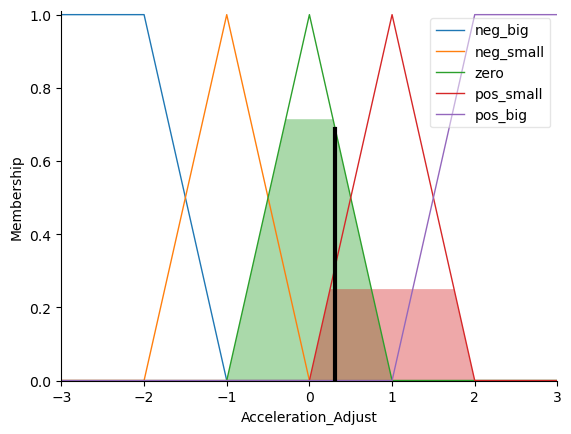

In [14]:
sim = ctrl.ControlSystemSimulation(acc_ctrl)

sim.input['Distance_to_next_car'] = 13
sim.input['Speed_change'] = -2.5

sim.compute()

print(f"Valeur de Acceleration_Adjust : {sim.output['Acceleration_Adjust']:.3f}")

acc_adjust.view(sim=sim)
plt.show()

## TP2: Logique floue et intégration du ML : 


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Partie 1: Génération du Dataset à partir du Système Flou

Dans cette partie, nous allons générer un **dataset synthétique** à partir du modèle flou conçu précédemment.

### Objectif :
Créer un jeu de données composé de :
- Deux variables d’entrée :
  - **Distance_to_next_car** : distance entre les véhicules (intervalle [0, 30])
  - **Speed_change** : variation de la vitesse du véhicule (intervalle [-20, 20])
- Une variable de sortie :
  - **Acceleration_Adjust** : ajustement d’accélération calculé par le système flou (valeur défuzzifiée)

### Méthodologie :
1. Générer 1000 observations aléatoires des deux entrées à l’aide de `numpy`.
2. Calculer la sortie floue correspondante pour chaque couple `(Distance_to_next_car, Speed_change)` à l’aide de `sim.compute()`.
3. Sauvegarder les résultats dans deux tableaux :
   - `X` pour les variables d’entrée (shape : 1000 x 2)
   - `y` pour la variable de sortie (shape : 1000)
4. Ces données serviront ensuite à **entraîner un modèle de Machine Learning**  pour comparer les performances entre logique floue et apprentissage automatique.


In [ ]:
n_samples = 1000
X = np.zeros((n_samples, 2))
y = np.zeros(n_samples)

np.random.seed(42)
for i in range(n_samples):
    d = np.random.uniform(0, 30)     # Distance_to_next_car
    s = np.random.uniform(-20, 20)   # Speed_change
    sim.input['Distance_to_next_car'] = d
    sim.input['Speed_change'] = s
    sim.compute()
    a = sim.output['Acceleration_Adjust']
    X[i] = [d, s]
    y[i] = a

## Partie 2 : Entraînement d’un Modèle de Régression (Machine Learning)

Dans cette étape, nous allons utiliser les données générées par le système flou pour **entraîner un modèle de régression** capable de prédire la variable de sortie `Acceleration_Adjust` à partir des deux entrées :
- `Distance_to_next_car`
- `Speed_change`

### Étapes suivies :
1. **Séparation du dataset** en un ensemble d’apprentissage (80%) et un ensemble de test (20%) à l’aide de `train_test_split`.
2. **Entraînement d’un modèle de régression** — ici, un **Random Forest Regressor** est choisi car il capture bien les relations non linéaires.
3. **Évaluation du modèle** à l’aide de deux métriques :
   - **MAE (Mean Absolute Error)** : erreur moyenne absolue entre les valeurs prédites et réelles.
   - **MSE (Mean Squared Error)** : erreur quadratique moyenne, pénalisant davantage les grandes erreurs.

Ces métriques permettront de comparer la **précision du modèle ML** avec la **logique floue** utilisée précédemment.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"MAE = {mae:.4f}")
print(f"MSE = {mse:.4f}")


MAE = 0.0335
MSE = 0.0044


## Partie 3 : Comparaison entre la Logique Floue et le Modèle de Machine Learning

###  Avantages de la Logique Floue
- **Explicabilité élevée** : le comportement du système est défini par des règles linguistiques simples.
  Cela permet de **comprendre facilement** comment les décisions sont prises.   
- **Pas besoin de données d’apprentissage** : le système repose sur la **connaissance experte** et non sur un grand volume de données.  
- **Robustesse et interprétabilité** : on peut **visualiser directement** les ensembles flous et ajuster manuellement les règles si nécessaire.

###  Avantages du Machine Learning
- **Haute précision prédictive** : les modèles comme Random Forest apprennent automatiquement les relations complexes entre les variables et peuvent obtenir une faible erreur (ici MAE = 0.0335 et MSE = 0.0044).  
- **Capacité d’adaptation** : le modèle peut être **réentraîné** facilement avec de nouvelles données pour améliorer ses performances.  
- **Automatisation** : aucune connaissance experte n’est requise pour définir des règles ; le modèle apprend directement à partir des données.

###  Conclusion
- La **logique floue** est idéale lorsque l’on souhaite un système **interprétable, transparent et basé sur l’expertise humaine**.  
- Le **machine learning** est préférable lorsque l’on dispose de **grandes quantités de données** et que la **précision** est la priorité, même si cela se fait au détriment de l’explicabilité.
